# Spare Parts Consumption Analysis and Clustering

This project analyze monthly consumption pattern of spare parts unsing Exploratory Data Analysis (EDA) and KMeans clustering.

## Objectives:

- clean and prepare spare parts data
- Explore using trend and variability
- Identify high-variance months and materials
- cluster spare parts based on consumption using KMeans
- Visualize clusters using PCA

### Load Data 

In [1]:
import pandas as pd

# Load Excel file
try:
    dataset = pd.read_excel(r"E:\Data Sciense Projects\spare parts consumption clustering\Spare_parts_consumption.xlsx", 
                            sheet_name="2023")
    print("Data loaded successfully!")
    print(dataset.head())
except Exception as e:
    print(f" Error loading file: {e}")


Data loaded successfully!
       Material  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct   Nov   Dec
0  sp1200000736  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   5.0
1  sp1200000780  NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN
2  sp1200007937  NaN  NaN  NaN  8.0  NaN  4.0  NaN  NaN  NaN  NaN  36.0  75.0
3  sp1200052905  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   5.0
4  sp1300028130  NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN   NaN   NaN


###  Data Preparation

In [2]:
# Extract material and monthly numeric data
material_ID = dataset["Material"]
monthly_consumption = dataset.select_dtypes(include=['number'])

# Fill NaNs with 0, ensure all values are non-negative
monthly_consumption = monthly_consumption.fillna(0).clip(lower=0)

# Combine into one DataFrame
df = pd.concat([material_ID, monthly_consumption], axis=1)

# Drop duplicated columns if any
df = df.loc[:, ~df.columns.duplicated()]

# Check for duplicate materials
print(" Duplicated Materials:", df['Material'].duplicated().sum())
df[df.duplicated('Material', keep=False)].head()


 Duplicated Materials: 0


,Material,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec


### Exploratery Data Analysis EDA

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
stats = df.describe()
stats



,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,1.691860,1.526163,0.575581,1.762355,2.085756,3.155523,1.488372,1.270349,1.123547,1.088663,1.857558,2.077035
std,11.387106,13.679292,6.203965,17.878671,15.587661,18.725177,11.829201,14.148192,9.412780,10.836995,13.653438,15.314696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,230.000000,318.000000,150.000000,330.000000,362.000000,295.000000,280.000000,354.000000,208.000000,252.000000,274.000000,200.000000


### Plot: Average Monthly Consumption

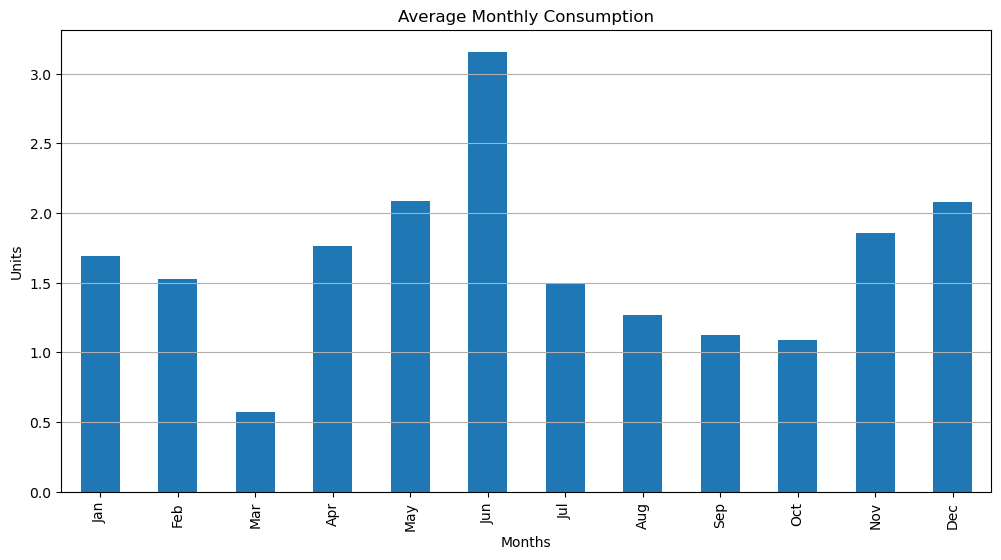

In [4]:
plt.figure(figsize=(12,6))
stats.loc['mean'].plot(kind='bar')
plt.title("Average Monthly Consumption")
plt.xlabel("Months")
plt.ylabel("Units")
plt.grid(axis='y')
plt.show()


### Plot: Total Monthly Consumption

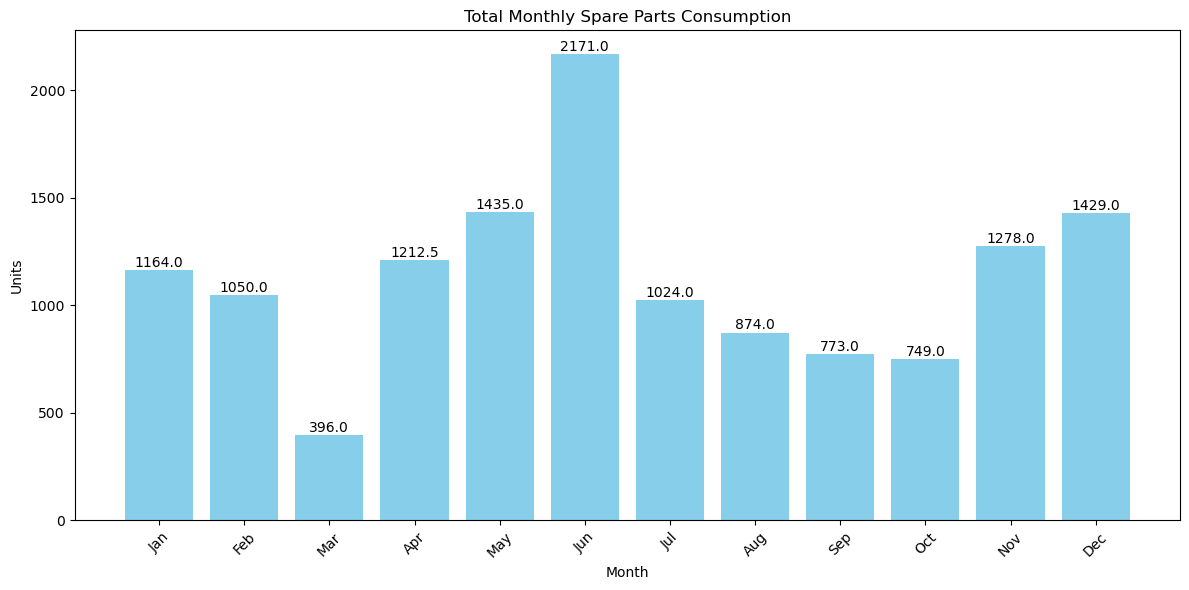

In [5]:
Monthly_sum = df.drop(columns="Material").sum()

plt.figure(figsize=(12,6))
bars = plt.bar(Monthly_sum.index, Monthly_sum, color='skyblue')
plt.title("Total Monthly Spare Parts Consumption")
plt.xlabel("Month")
plt.ylabel("Units")
plt.xticks(rotation=45)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             round(bar.get_height(), 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [6]:
### Plot: Total Monthly Consumption

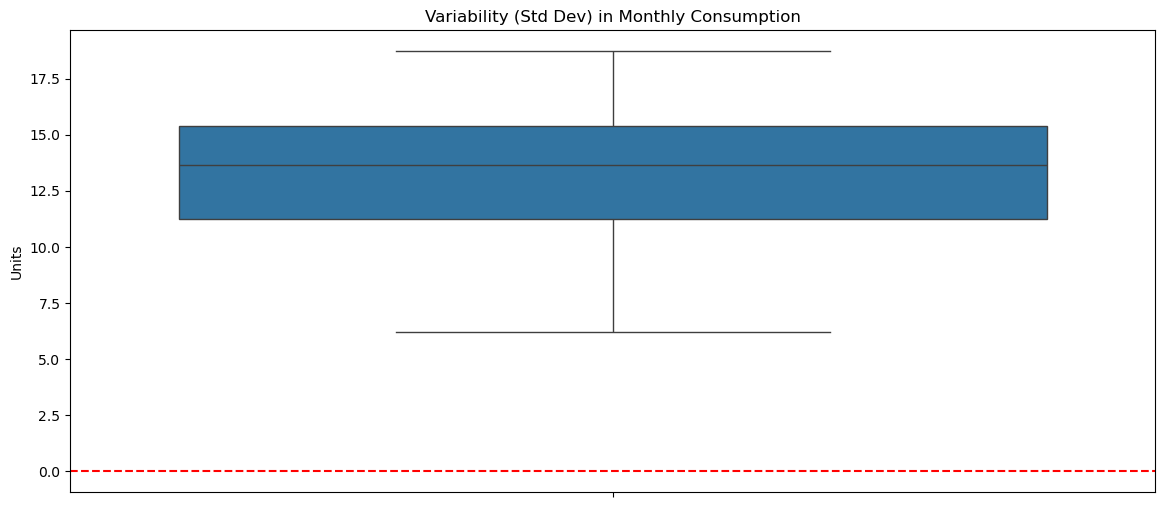

In [7]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=stats.loc['std'])
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Variability (Std Dev) in Monthly Consumption')
plt.ylabel('Units')
plt.xticks(rotation=45)
plt.show()


#### The above Boxplot represent the standard deviation (variability) in monthly consumption
 - The median standard deviation is approximitly 13 unit, indicating a moderate level of variability in consumption across most    months
 - The Interquartile Range (IQR) is relatively narrow, indicating a consistency in variablity.
 - The lowest variability is aroung 6.5 unit reflecting to the most stable months in consumption.
 - The highest variability is around 18.5 unit, reflecting to some months have more fluctation.
 - No outliers are observed, meaning all monnthly consumptions within a typical variability range

### Plot: Mean VS STD

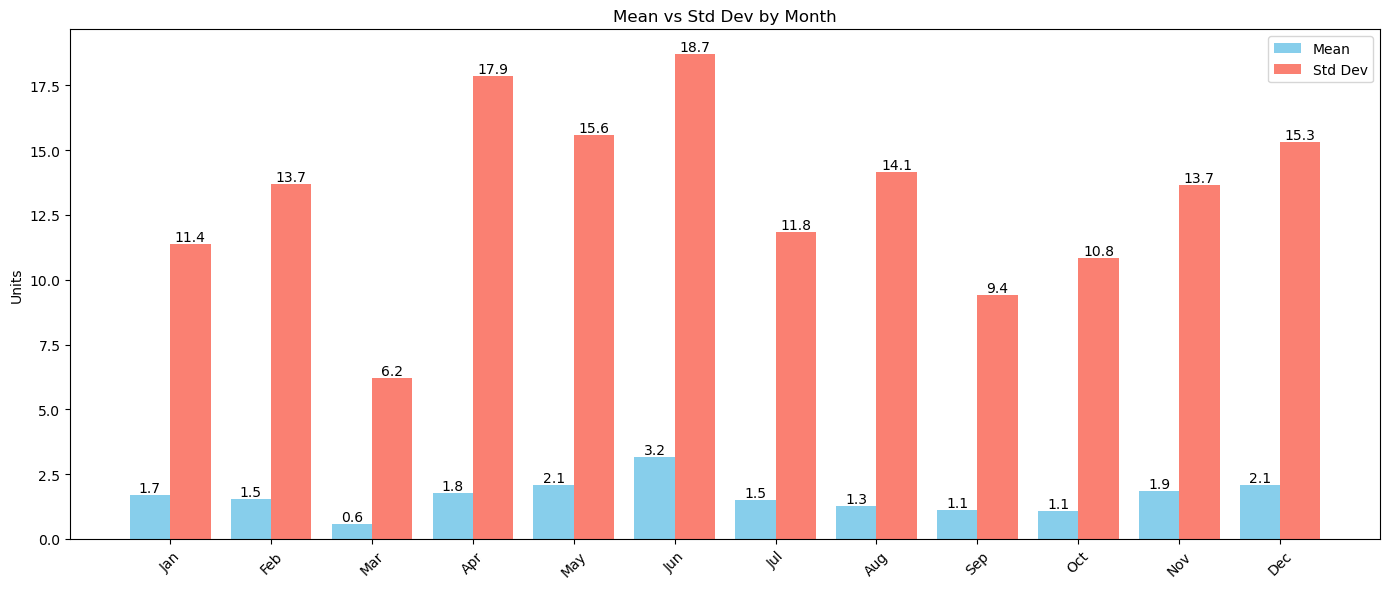

In [8]:
import numpy as np
x = np.arange(len(stats.columns))

plt.figure(figsize=(14, 6))
mean_bars = plt.bar(x - 0.2, stats.loc['mean'], width=0.4, label='Mean', color='skyblue')
std_bars = plt.bar(x + 0.2, stats.loc['std'], width=0.4, label='Std Dev', color='salmon')

plt.title("Mean vs Std Dev by Month")
plt.ylabel("Units")
plt.xticks(x, stats.columns, rotation=45)
plt.legend()

for bar in mean_bars + std_bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Investigate parts with unusually high consumption in June


Top Materials Causing High June Consumption:
         Material    Jun
338  sp1300058596  295.0
339  sp1300058597  250.0
363  sp1300060173  234.0
343  sp1300060153   78.0
177  sp1300048282   69.0


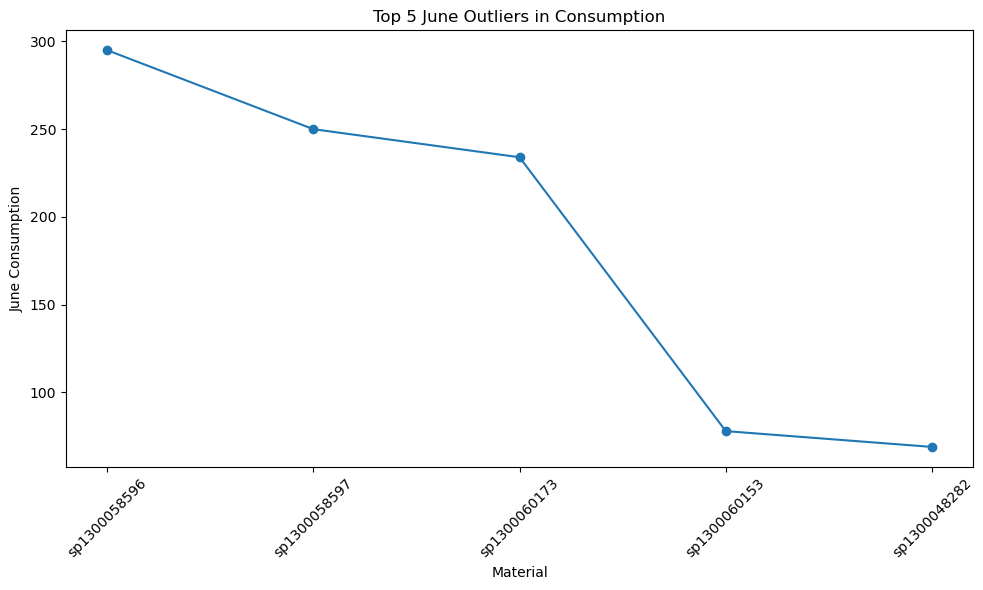

In [9]:
jun_mean = stats['Jun']['mean']
jun_std = stats['Jun']['std']
threshold = jun_mean + jun_std

# Get materials exceeding threshold
high_june = df[df['Jun'] > threshold].sort_values(by='Jun', ascending=False).head()

print("Top Materials Causing High June Consumption:")
print(high_june[['Material', 'Jun']])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(high_june['Material'], high_june['Jun'], marker='o')
plt.title("Top 5 June Outliers in Consumption")
plt.xlabel("Material")
plt.ylabel("June Consumption")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Clustering: KMeans

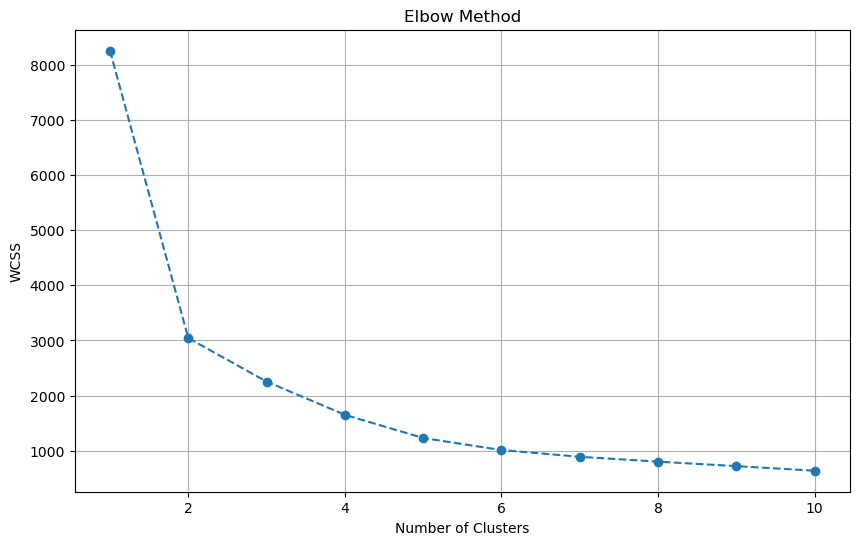

In [10]:
import os
os.environ["OMP_NUM_THREADS"] = '3'

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Drop Material column
X = df.drop(columns="Material")

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


### Lower WCSS generally indicates that the data points within each cluster are closer to their respective centroids, we could choose weither 3 or 4 clusters, here I prefer 4

In [24]:
# Apply KMeans with chosen number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster-wise mean analysis
#df.groupby('Cluster').mean()
df[df['Cluster'] == 3][['Material', 'Cluster']].head()


,Material,Cluster
26,sp1300047088,3
27,sp1300047089,3
365,sp1300060175,3


###  Calculate the explained_variance_ration_ in the dataset to choose the number of PCA 

Explained variance ratio for each component: [0.73335358 0.09825336 0.06068271 0.02957194 0.02355621 0.01426042
 0.01054283 0.01000344 0.00775478 0.00502916 0.00387109 0.00312048]
Total explained variance: 1.0000


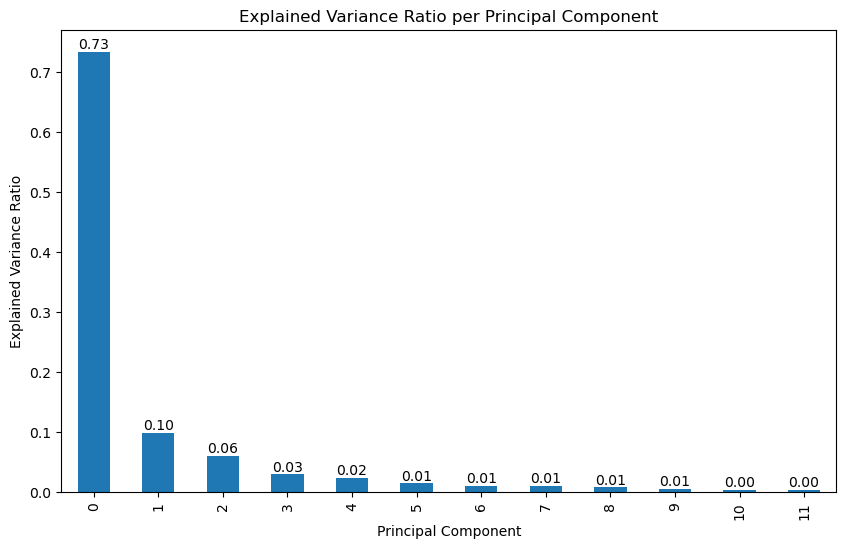

In [56]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()

# Fit PCA to your scaled data
pca.fit(X_scaled)

# The 'explained_variance_ratio_' attribute gives you the variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# To check if 100% of the variance is explained, sum the explained variance ratios
total_explained_variance = np.sum(explained_variance_ratio)

print(f"Explained variance ratio for each component: {explained_variance_ratio}")
print(f"Total explained variance: {total_explained_variance:.4f}")

explained_variance_series = pd.Series(explained_variance_ratio)
bars = explained_variance_series.plot(kind="bar",figsize=(10,6))
plt.title("Explained Variance Ratio per Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")

for bar in bars.patches:  # Access the bar patches
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom')


In [57]:
print(f"The Explained variance using 2 PCA is  {(explained_variance_ratio[0]+explained_variance_ratio[1]) *100} %" )

The Explained variance using 2 PCA is  83.1606938765208 %


### Using Principal Component Analysis PCA for dimensionality reduction, finding the best components to describe the data and reduce its dimensions

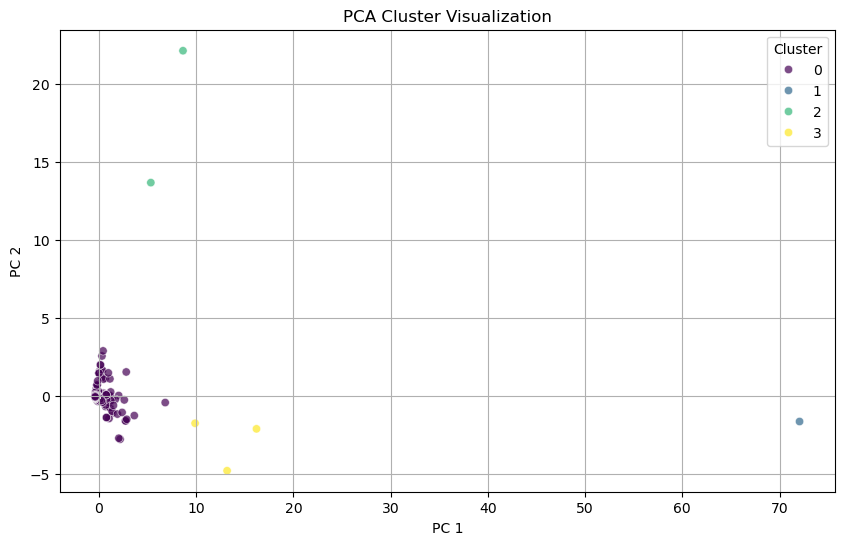

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.title("PCA Cluster Visualization")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


###  Calculate the explained_variance_ration_ in the dataset to choose the number of PCA 

In [41]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()

# Fit PCA to your scaled data
pca.fit(X_scaled)

# The 'explained_variance_ratio_' attribute gives you the variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# To check if 100% of the variance is explained, sum the explained variance ratios
total_explained_variance = np.sum(explained_variance_ratio)

print(f"Explained variance ratio for each component: {explained_variance_ratio}")
print(f"Total explained variance: {total_explained_variance:.4f}")

print(f"The Explained variance using 2 PCA is  {(explained_variance_ratio[0]+explained_variance_ratio[1]) *100} %" )


Explained variance ratio for each component: [0.73335358 0.09825336 0.06068271 0.02957194 0.02355621 0.01426042
 0.01054283 0.01000344 0.00775478 0.00502916 0.00387109 0.00312048]
Total explained variance: 1.0000
The Explained variance using 2 PCA is  83.1606938765208 %


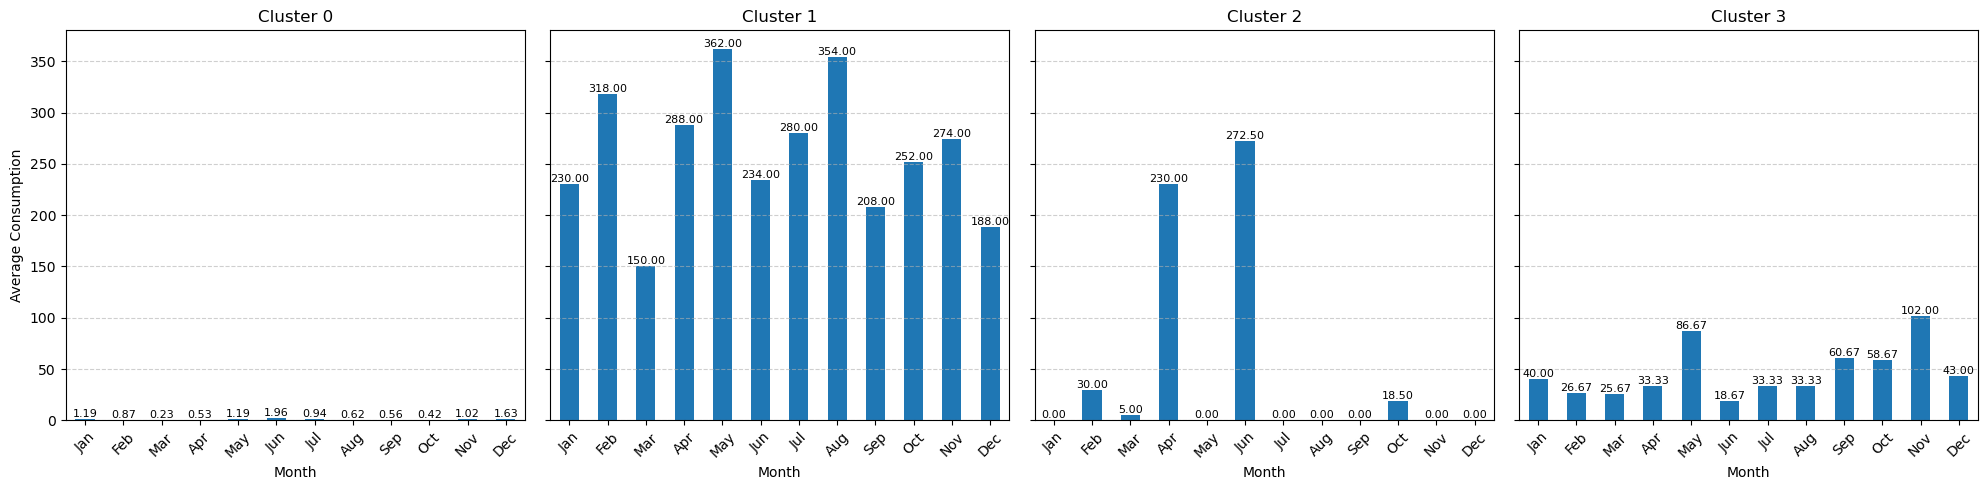

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing 'Material', month columns, and 'Cluster'
def plot_average_consumption_per_cluster(df, optimal_clusters):

    fig, axes = plt.subplots(1, optimal_clusters, figsize=(5 * optimal_clusters, 5), sharey=True)  # Adjust figsize

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    for i in range(optimal_clusters):
        cluster_data = df[df['Cluster'] == i]
        avg_consumption = cluster_data[months].mean()

        ax = axes[i] if optimal_clusters > 1 else axes
        bars = avg_consumption.plot(kind='bar', ax=ax)  # Store the bar objects
        ax.set_title(f'Cluster {i}')
        ax.set_xlabel('Month')
        ax.set_ylabel('Average Consumption')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', linestyle='--', alpha=0.6)

        # Add the data labels above each bar
        for bar in bars.patches:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
                    ha='center', va='bottom', fontsize=8)  # Adjust fontsize as needed

    plt.tight_layout()
    plt.show()

# Assuming you have the 'df' DataFrame and 'optimal_clusters' defined
plot_average_consumption_per_cluster(df.copy(), optimal_clusters)  # Pass a copy

### Interpretation of each clusters
#### - Cluster 0 : Low and Steady Consumption

- Very low average consumption across all months
- Infrequently used and rare maintenance 
* Effective inventory management should focus on minimizing holding cost.

#### Cluster 1 : High and Seasonal Peak Consumption
- Higher average consumption, the consumption fluctaute throughout the year
- Shows higher in Feb, May and Aug due to seasonality or maintenance schedule. 
- Effective inventory management should focus on avoiding stockouts.

#### Cluster 2 : High and Variable Consumption
-Higher average consumption concentrated on Apr and Jun due to sesonality and maintenance schedule.
- Effective inventory management should focus on avoiding stockouts during the Apr and Jun , while minimizing inventory during the rest of the year to avoid excessive holding costs.

#### Cluster 3 : Gradually Increasing/Decreasing Consumption

- Moderate average consumption compared to cluster 1 and 2
- Some level of seasonlity appears in May and Nov
- Effective inventory management should focus on avoiding stockouts.


#### In summary, the clustering has successfully identified different groups of spare parts with distinct monthly consumption patterns, ranging from consistently low demand (Cluster 0) to strong mid-year seasonality (Cluster 1), a sharp spring peak (Cluster 2), and a more moderately fluctuating demand with some seasonality (Cluster 3). 

